In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
#import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#divide the dataset into independent and dependent features
X=df.iloc[:,3:14]
y=df.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


Feature Engineering

In [ ]:
geography=pd.get_dummies(X['Geography'],dtype=int,drop_first=True)
gender=pd.get_dummies(X['Gender'],dtype=int,drop_first=True)


In [ ]:
print(geography)
print(gender)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [ ]:
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#concatinating the variables
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.03227043,
         1.10643166, -0.50624244],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.9687384 ,
        -0.74866447, -0.50624244],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.03227043,
         1.48533467, -0.50624244],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -1.03227043,
         1.41231994, -0.50624244],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.9687384 ,
         0.84432121, -0.50624244],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.03227043,
         0.32472465,  1.97533814]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.9687384 ,
         1.61085707, -0.50624244],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.03227043,
         0.49587037,  1.97533814],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.9687384 ,
        -0.42478674, -0.50624244],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -1.03227043,
         0.71888467, -0.50624244],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.9687384 ,
        -1.54507805, -0.50624244],
       [-0.79945688, -0.84742473,  1.04473698, ..., -1.03227043,
         1.61255917, -0.50624244]])

In [ ]:
X_train.shape

(8000, 9)

Creating the ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

Initialize the ANN

In [ ]:
Classifier=Sequential()

In [ ]:
#Adding the input layer
Classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#adding the first hidden layer
Classifier.add(Dense(units=7,activation='relu'))
Classifier.add(Dropout(0.2))

In [ ]:
#adding the second hidden layer
Classifier.add(Dense(units=6,activation='relu'))
Classifier.add(Dropout(0.3))

In [ ]:
##adding the output layer
Classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
##Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

Training the neural network

In [ ]:
model_history=Classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8686 - loss: 0.5934 - val_accuracy: 1.0000 - val_loss: 0.2529
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9277 - loss: 0.2635 - val_accuracy: 1.0000 - val_loss: 0.0771
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9313 - loss: 0.1747 - val_accuracy: 1.0000 - val_loss: 0.0353
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9332 - loss: 0.1600 - val_accuracy: 1.0000 - val_loss: 0.0206
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9296 - loss: 0.1501 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9384 - loss: 0.1359 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9325 - loss: 0.1402 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9308 - loss: 0.1403 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

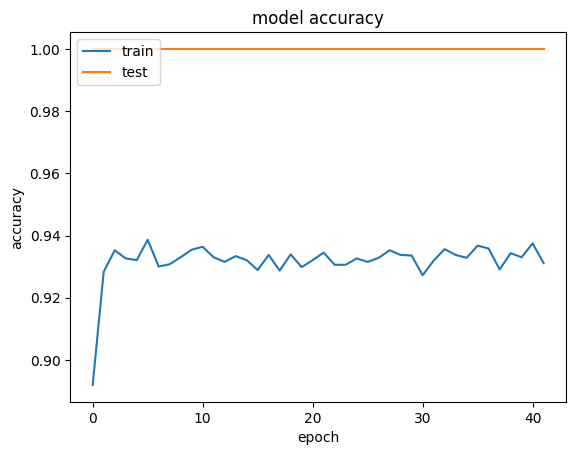

In [ ]:
#Summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

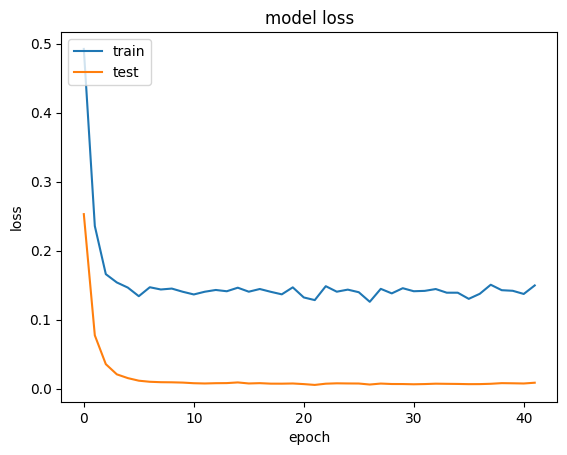

In [ ]:
#Summary history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Prediction

In [ ]:
#Prediction on test data
y_pred=Classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Evaluation

In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [   0,  405]])

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

1.0

In [ ]:
#get the weights
Classifier.get_weights()

[array([[ 0.54723376,  0.04218977, -0.0730469 , -0.054105  ,  0.1195214 ,
         -0.34310257, -0.04285463,  0.1963779 , -0.24133438, -0.26360774,
          0.376412  ],
        [-0.17004329,  0.46022215, -0.04724732,  0.4405089 ,  0.19601576,
          0.2142381 ,  0.1171948 , -0.15620132, -0.14408572, -0.45988908,
         -0.5173011 ],
        [-0.5444598 ,  0.07440493, -0.04684283, -0.33306077, -0.43128645,
          0.50064546,  0.13426077,  0.10983188,  0.39753172,  0.2987978 ,
         -0.58427894],
        [-0.01999958,  0.01726378,  0.18961927, -0.46958596,  0.0546662 ,
         -0.19223164, -0.08311895,  0.33594123, -0.1879468 ,  0.5939687 ,
          0.35316816],
        [ 0.20288281, -0.31076142,  0.17109795,  0.14382462, -0.08946584,
         -0.22481047, -0.05316063,  0.4335442 , -0.3133406 , -0.02525463,
          0.45929316],
        [-0.6358191 ,  0.35131928,  0.06711058,  0.5529355 , -0.47874734,
          0.22383055, -0.12093508,  0.11864308,  0.36736098,  0.0482494